In [209]:
import utils

# viz stuff
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import cm

# libraries used to solve it
import re
import numpy as np

# Day 3 No Matter How You Slice It

grabbing the input:

In [17]:
inp = utils.get_input(3).splitlines()
inp[-5:]

['#1369 @ 61,754: 14x28',
 '#1370 @ 782,52: 29x21',
 '#1371 @ 622,190: 16x12',
 '#1372 @ 209,614: 21x21',
 '#1373 @ 369,713: 20x29']

each claim spec is: `x, y, h, w`

So looking at the test input:

In [104]:
# #123 @ 3,2: 5x4
grid = np.zeros(shape=(9,11))
grid[2:2+4:, 3:3+5] += 1
grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

So that seems to be working, with the numpy grid referencing being y first, x second, so `grid[y:y+h, x:x+w]`.

Converting the input string into a list of claims:

In [105]:
claims = []

for claim in inp:
    claims.append([int(i) for i in re.findall("[\d]+", claim)])
    
claims[-5:]

[[1369, 61, 754, 14, 28],
 [1370, 782, 52, 29, 21],
 [1371, 622, 190, 16, 12],
 [1372, 209, 614, 21, 21],
 [1373, 369, 713, 20, 29]]

Now I'm placing every claim onto the fabric:

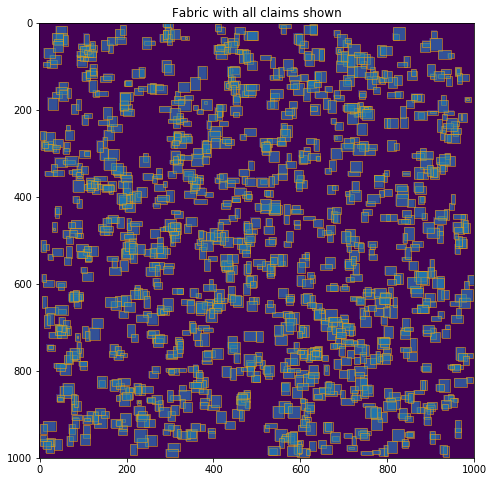

In [207]:
fabric = np.zeros(shape=(1000,1000))

patches = []
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Fabric with all claims shown")

for claim in claims:
    num, x, y, w, h = claim
    fabric[y:y+h,x:x+w] += 1
    
    patches.append(Rectangle((x,y), w,h, label=str(num)))
    
pc = PatchCollection(patches, alpha=0.5, facecolor=None, edgecolor="orange")
ax.add_collection(pc)

ax.imshow(fabric);

The number of overlapping squares is just where the value is more than 1:

In [110]:
len(fabric[fabric > 1])

118858

answer to part 1: `118858`

# Part 2

find the only non-overlapping claim - here I just go through each claim:

In [211]:
for claim in claims:
    num, x, y, w, h = claim
    if np.sum(fabric[y:y+h,x:x+w]) == w * h:
        print(claim)
        break

[1100, 355, 404, 29, 11]
